 <center> <h1> <b> Dynamic Time Warping (DTW) </b> </h1> </center>

**Part (a). Dynamic Time Warping(DTW)**

In this part, you need to implement the basic sequence matching algorithm DTW.

Two sequences $ A $ and $ B $ can be compared using a Euclidean distance:

$$ A = (x_1, x_2, x_3, ..., x_M) $$

$$ B = (y_1, y_2, y_3, ..., y_N) $$

Now the distance is computed as:

$$ D(A, B) = \frac{1}{N} \sum_{i=1}^{N} ||x_i - y_i|| $$

There are two main issues:

1. What if the sequences are not aligned in time?
2. What if the sequences have varying lengths?

The non-linear alignment path produces a better similarity measure.

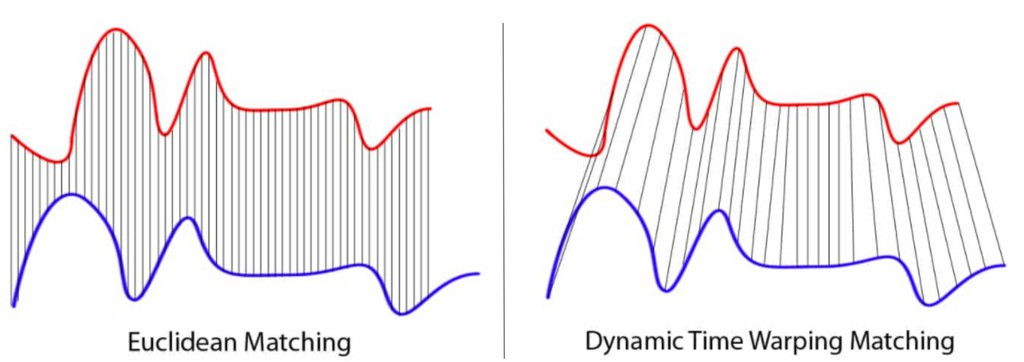

**Algorithm**

1. Compute the distance matrix $ D_{M \times N} $ between $ A $ and $ B $.
2. Compute the accumulated distance matrix $ C_{M \times N} $ between $ A $ and $ B $.
    - Initialize: $ C(0,0) = D(0,0) $
    - For $ i = 1, 2, ..., M $ and $ j = 1, 2, ..., N $:
        - Update $ C $:
            $$ C(i,j) = D(i,j) + \min \{ C(i-1, j-1), C(i, j-1), C(i-1, j) \} $$
        - Store the best path:
            $$ P(i,j) = \arg \min \{ C(i-1, j-1), C(i, j-1), C(i-1, j) \} $$
3. $ C(M,N) $ gives the similarity measure.
4. Backtrack the best alignment path:
    $$ q^*_T = (M,N) $$
    $$ q^{*}_{t-1} = P(q^*_t) $$
    $$ t = T, T-1, ..., 1 $$

**Programming Question**

Consider the following two sequences:

$$ A = [4, 3, 7, 0, 2, 6, 5] $$

$$ B = [3, 7, 1, 6, 1, 5, 4, 4] $$

Write a DTW algorithm to find the optimal similarity/distance between them.
- Compute the distance matrix between the two sequences.
- Compute the accumulated distance matrix.
- Backtrack from the accumulated distance matrix to get the optimal path and thereby compute the optimal distance.
- Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes.

Optimal Distance: 9.0


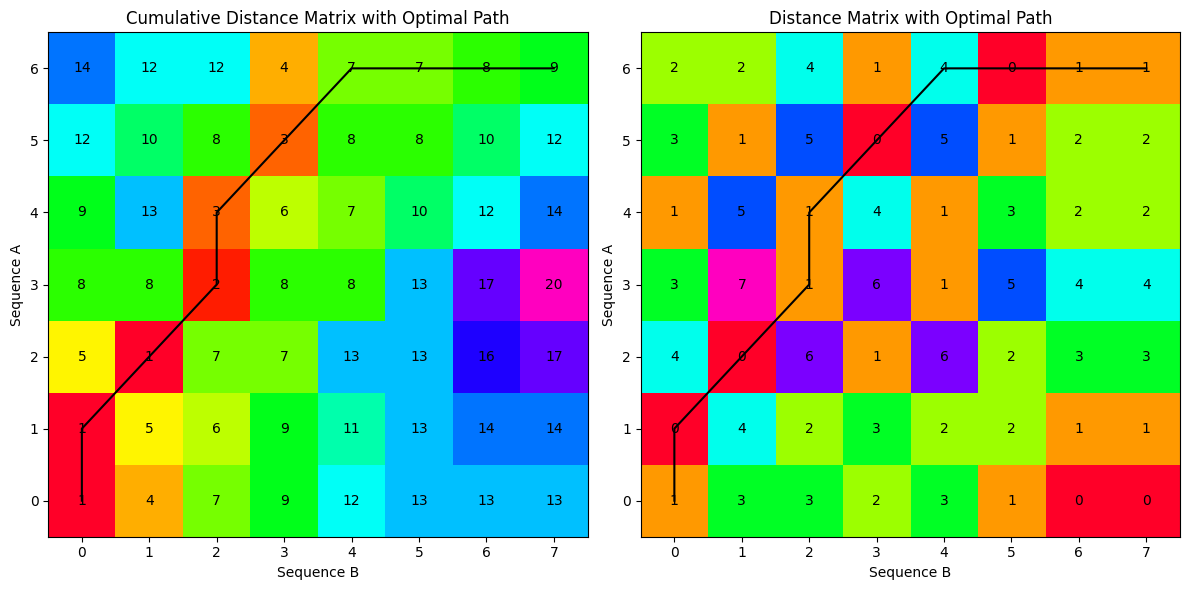

In [1]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

def DTW(sequence1, sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################
    m = len(sequence1)
    n = len(sequence2)

    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix = np.zeros((m, n))
    p = np.zeros((m, n), dtype=int)  # Initialize p with zeros

    DTW_cumulate_Matrix[0][0] = np.abs(sequence1[0] - sequence2[0])
    for i in range(1, m):
        DTW_cumulate_Matrix[i][0] = np.abs(sequence1[i] - sequence2[0]) + DTW_cumulate_Matrix[i - 1][0]
    for j in range(1, n):
        DTW_cumulate_Matrix[0][j] = np.abs(sequence1[0] - sequence2[j]) + DTW_cumulate_Matrix[0][j - 1]

    for i in range(1, m):
        for j in range(1, n):
            DTW_cumulate_Matrix[i][j] = np.abs(sequence1[i] - sequence2[j]) \
                                         + min([DTW_cumulate_Matrix[i - 1][j - 1], DTW_cumulate_Matrix[i][j - 1],
                                                DTW_cumulate_Matrix[i - 1][j]])
            min_index = np.argmin([DTW_cumulate_Matrix[i - 1][j - 1], DTW_cumulate_Matrix[i][j - 1],
                                   DTW_cumulate_Matrix[i - 1][j]])
            p[i][j] = min_index

    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    opt_distance = DTW_cumulate_Matrix[m - 1][n - 1]

    alignment_path = [(m - 1, n - 1)]
    i, j = m - 1, n - 1
    while i > 0 and j > 0:
        if p[i][j] == 0:
            i, j = i - 1, j - 1
        elif p[i][j] == 1:
            i, j = i, j - 1
        else:
            i, j = i - 1, j
        alignment_path.append((i, j))
    alignment_path.reverse()

    return opt_distance, DTW_cumulate_Matrix

def plotDTWpath(sequence1, sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################

    # Compute distance and cumulative distance between the given sequences
    opt_distance, DTW_cumulate_Matrix = DTW(sequence1, sequence2)
    print("Optimal Distance:",opt_distance)
    # Obtain the optimal path using "DTW" function
    i, j = len(sequence1) - 1, len(sequence2) - 1
    path = [(i, j)]
    while i != 0 and j != 0:
        indexes = np.argmin([DTW_cumulate_Matrix[i-1, j], DTW_cumulate_Matrix[i-1, j-1], DTW_cumulate_Matrix[i, j-1]])
        if indexes == 0:
            i -= 1
        elif indexes == 1:
            i -= 1
            j -= 1
        else:
            j -= 1
        path.append((i, j))

    path.append((0, 0))

    # Plot the optimal path on distance and cumulative matrices
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(DTW_cumulate_Matrix, origin='lower', cmap='gist_rainbow', aspect='auto')
    plt.plot([x[1] for x in path], [x[0] for x in path], color='black')
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            plt.text(j, i, f'{int(DTW_cumulate_Matrix[i,j])}', ha='center', va='center', color='black')
    plt.title('Cumulative Distance Matrix with Optimal Path')
    plt.xlabel('Sequence B')
    plt.ylabel('Sequence A')

    plt.subplot(1, 2, 2)
    distance_matrix = np.zeros((len(sequence1), len(sequence2)))
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            distance_matrix[i, j] = np.abs(sequence1[i] - sequence2[j])
            plt.text(j, i, f'{int(distance_matrix[i,j])}', ha='center', va='center', color='black')
    plt.imshow(distance_matrix, origin='lower', cmap='gist_rainbow', aspect='auto')
    plt.plot([x[1] for x in path], [x[0] for x in path], color='black')
    plt.title('Distance Matrix with Optimal Path')
    plt.xlabel('Sequence B')
    plt.ylabel('Sequence A')

    plt.tight_layout()
    plt.show()

# Given sequences
sequence1 = [4, 3, 7, 0, 2, 6, 5]
sequence2 = [3, 7, 1, 6, 1, 5, 4, 4] 

# Call plotDTWpath function
plotDTWpath(sequence1, sequence2)

**Report your observations**

**1. Cumulative Distance Matrix**: The left plot shows a cumulative distance matrix where the optimal path is marked, indicating the sequence of steps that results in the minimum cumulative distance for aligning the two sequences.

**2. Distance Matrix**: The right plot displays a distance matrix with a different optimal path. This suggests that the two sequences being compared have distinct features, as the path deviates from the diagonal, which would represent a perfect match.

**3. Optimal Path and Distance**: The optimal paths in both matrices suggest that while there are similarities between the sequences, there are also clear differences, as evidenced by the non-linear paths and the cumulative distance value. 
**Optimal Distance: 9.0**

**Part (b): In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm.**

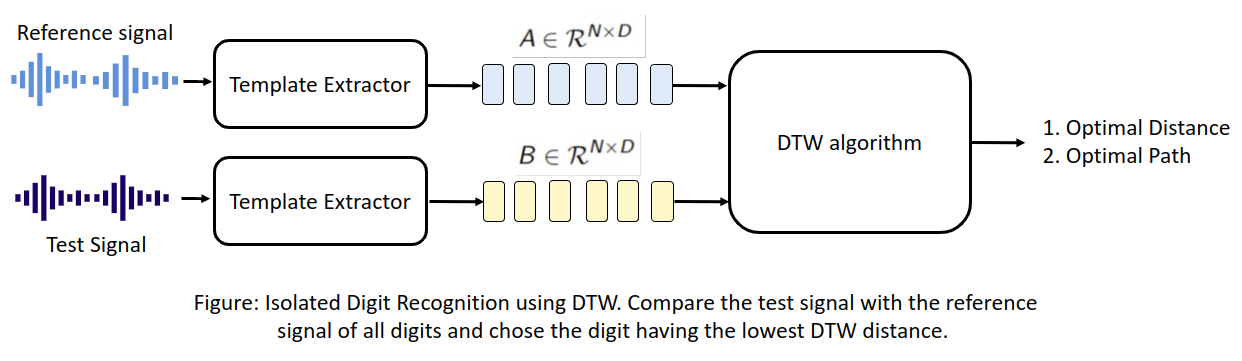

1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. 
2. Record three further repetitions of the same digits (Isolated words) as test data.   
3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals.   
4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. 
5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   
6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. 
7. Create a confusion matrix and report the most confusing digits. 

<span style="color:red">**NOTE:**</span> 
<span style="color:yellow">Please download the zip folder containing my recording and recordings of all four speakers. After downloading, extract the contents of the zip folder. You can then directly run the extracted files.</span> 

In [2]:
import scipy.io.wavfile as wav
from python_speech_features import mfcc
import speechpy

In [3]:
def load_data(file_name):
    (rate,sig) = wav.read(file_name)
    sig=sig-np.mean(sig)
    mfcc_feat=mfcc(sig, rate, numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
    mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
    return mfcc_feat_cmvn

**Algorithm to perform isolated digit recognition**

In [4]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

def vectorDTW(sequence1, sequence2):
    # Input: Two sequences
    # Output: DTW path and optimal distance
    
    m = sequence1.shape[0]
    n = sequence2.shape[0]
    
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix = np.zeros((m, n))
    p = np.zeros((m, n), dtype=int)  # Initialize p with zeros

    DTW_cumulate_Matrix[0][0] = np.mean(np.abs(sequence1[0] - sequence2[0]))
    for i in range(1, m):
        DTW_cumulate_Matrix[i][0] = np.mean(np.abs(sequence1[i] - sequence2[0])) + DTW_cumulate_Matrix[i - 1][0]
    for j in range(1, n):
        DTW_cumulate_Matrix[0][j] = np.mean(np.abs(sequence1[0] - sequence2[j])) + DTW_cumulate_Matrix[0][j - 1]

    for i in range(1, m):
        for j in range(1, n):
            DTW_cumulate_Matrix[i][j] = np.mean(np.abs(sequence1[i] - sequence2[j])) \
                                         + min([DTW_cumulate_Matrix[i - 1][j - 1], DTW_cumulate_Matrix[i][j - 1],
                                                DTW_cumulate_Matrix[i - 1][j]])
            min_index = np.argmin([DTW_cumulate_Matrix[i - 1][j - 1], DTW_cumulate_Matrix[i][j - 1],
                                   DTW_cumulate_Matrix[i - 1][j]])
            p[i][j] = min_index

    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    opt_distance = DTW_cumulate_Matrix[m - 1][n - 1]

    alignment_path = [(m - 1, n - 1)]
    i, j = m - 1, n - 1
    while i > 0 and j > 0:
        if p[i][j] == 0:
            i, j = i - 1, j - 1
        elif p[i][j] == 1:
            i, j = i, j - 1
        else:
            i, j = i - 1, j

        alignment_path.append((i, j))
    alignment_path.append((0, 0))
    alignment_path.reverse()

    return opt_distance, DTW_cumulate_Matrix, alignment_path

def plotDTWpath(sequence1, sequence2):
    # Inputs: sequence1 and sequence2
    # Outputs: plot of optimal path on distance matrix and cumulative distance matrix
    
    # Compute distance and cumulative distance between the given sequences
    opt_distance, DTW_cumulate_Matrix, path = vectorDTW(sequence1, sequence2)

    # Plot the optimal path on distance and cumulative matrices
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(DTW_cumulate_Matrix, origin='lower', cmap='jet', aspect='auto')
    plt.plot([x[1] for x in path], [x[0] for x in path], color='red')
    plt.title('Cumulative Distance Matrix with Optimal Path')
    plt.xlabel('Sequence B')
    plt.ylabel('Sequence A')

    plt.subplot(1, 2, 2)
    distance_matrix = np.zeros((len(sequence1), len(sequence2)))
    for i in range(len(sequence1)):
        for j in range(len(sequence2)):
            distance_matrix[i, j] = np.abs(sequence1[i] - sequence2[j]).mean()  # Compute mean absolute difference
    plt.imshow(distance_matrix, origin='lower', cmap='jet', aspect='auto')
    plt.plot([x[1] for x in path], [x[0] for x in path], color='red')
    plt.title('Distance Matrix with Optimal Path')
    plt.xlabel('Sequence B')
    plt.ylabel('Sequence A')

    plt.tight_layout()
    plt.show()

**Plot the optimal DTW path**

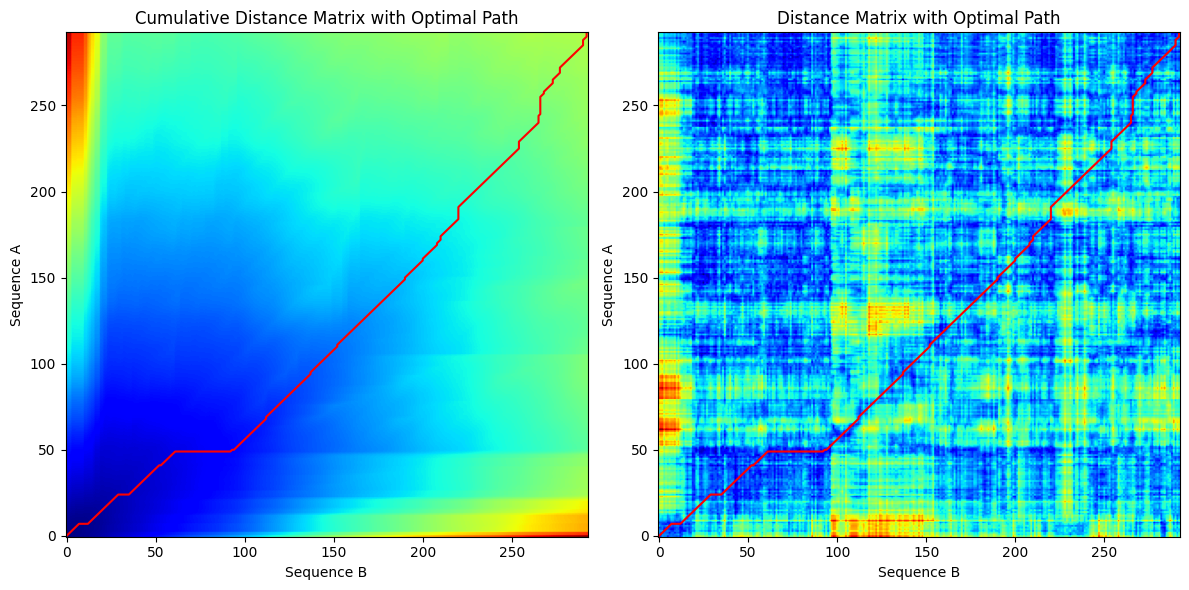

In [5]:
# Given sequences
sequence1 = load_data('recording_1_1.wav')   # Size of sequence2 is 293x13
sequence2 = load_data('recording_1_2.wav')   # Size of sequence2 is 293x13

# Call plotDTWpath function
plotDTWpath(sequence1, sequence2)

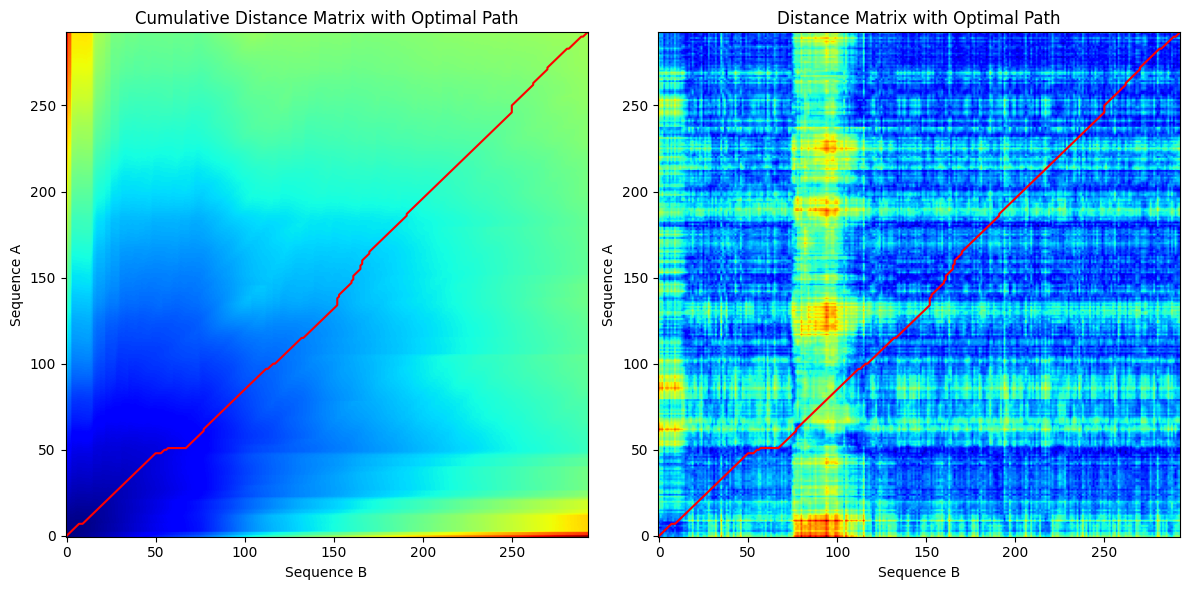

In [6]:
# Given sequences
sequence1 = load_data('recording_1_1.wav')  # Size of sequence1 is 293x13
sequence2 = load_data('recording_2_1.wav')  # Size of sequence2 is 293x13

# Call plotDTWpath function
plotDTWpath(sequence1, sequence2)    

**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [7]:
def train_and_test():
    # Initialize an empty list to store training data
    training_data = []

    # Load training data
    for i in range(10):
        file = load_data(f"recording_{i}_4.wav")
        training_data.append(file)

    # Initialize confusion matrix
    confusion_matrix = np.zeros((10, 10))

    # Populate confusion matrix
    for i in range(10):  # For each true label
        for j in range(1, 4):  # For files 2 to 4 (testing files)
            file = f"recording_{i}_{j}.wav"
            arr = []
            for k in range(10):  # For each training data
                train = training_data[k]
                test = load_data(file)
                opt_distance, _, _ = vectorDTW(train, test) 
                arr.append(opt_distance)

            # Find the index with minimum distance (predicted label)
            index = np.argmin(arr)
            confusion_matrix[index][i] += 1

    # Calculate accuracy
    accuracy = 100 * np.sum(np.diag(confusion_matrix)) / 30

    # Print accuracy and confusion matrix
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(confusion_matrix)

train_and_test()

Accuracy: 53.333333333333336
Confusion Matrix:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0. 0.]
 [1. 1. 0. 1. 0. 0. 3. 0. 2. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**Report your observations**

**1. Comparison of Different Numbers:**
- The optimal paths in both the Cumulative Distance Matrix and the Distance Matrix deviate significantly from the diagonal. This indicates that the two audio recordings of different numbers have distinct features.
- The color intensities in the matrices vary widely, reflecting the differences in distances between corresponding elements in the two different number sequences.
- The optimal distance is relatively large, further suggesting a high degree of dissimilarity between the two different numbers.

**2. Comparison of Same Numbers:**
- The optimal paths in both matrices for the same numbers are closer to the diagonal, indicating a high degree of similarity between the two recordings.
- The color intensities in the matrices are more uniform compared to the comparison of different numbers, suggesting smaller distances between corresponding elements in the two same number sequences.
- The optimal distance is smaller, indicating that the two recordings of the same number are similar.

**3. Confusion matrix for 30 recordings, here are three key observations:**

- **Accuracy**: The classification model has an accuracy of approximately **53.33%**, which suggests that it correctly identifies the digits a little over half the time.
- **Misclassifications**: There are likely some digits that are more frequently misclassified than others, which can be identified by the off-diagonal elements with higher values in the confusion matrix.
- **Improvement Areas**: The confusion matrix can be used to pinpoint specific areas where the model's performance could be improved, such as training on more varied data or tweaking the model parameters.

**Part (c): In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.**
1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy.
2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker.
3. Please report some of the changes to improve the system performance.

**Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from the same speaker**

In [8]:
def train_and_test_speaker(speaker):
    training_data = []
    # Load training data
    for i in range(10):
        file_name = f"{i}_{speaker}_0.wav"
        file_path = f"{speaker}/{file_name}"  
        file = load_data(file_path)
        training_data.append(file)

    # Initialize confusion matrix
    confusion_matrix = np.zeros((10, 10))

    # Populate confusion matrix
    for i in range(10):  
        for j in range(1, 50):  # For files 1 to 49 (testing files)
            file_name = f"{i}_{speaker}_{j}.wav"
            file_path = f"{speaker}/{file_name}" 
            arr = []
            for k in range(10):  
                train = training_data[k]
                test = load_data(file_path)
                opt_distance, _, _ = vectorDTW(train, test) 
                arr.append(opt_distance)

            # Find the index with minimum distance (predicted label)
            index = np.argmin(arr)
            confusion_matrix[index][i] += 1

    # Calculate accuracy
    accuracy = 100 * np.sum(np.diag(confusion_matrix)) / (10 * 49)  
    print(f"Accuracy for {speaker}: {accuracy}%")
    print("Confusion Matrix:")
    print(confusion_matrix)

speakers = ["jackson", "nicolas", "theo", "yweweler"]

for speaker in speakers:
    train_and_test_speaker(speaker)


Accuracy for jackson: 84.48979591836735%
Confusion Matrix:
[[49.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 41.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0. 48.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 41.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0. 47.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  5.  0. 49.  5.  8.  0.  3.]
 [ 0.  0.  0.  0.  0.  0.  6.  0.  0.  0.]
 [ 0.  0.  0.  3.  0.  0. 16. 39.  0.  0.]
 [ 0.  6.  1.  0.  2.  0. 21.  2. 49.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0. 45.]]
Accuracy for nicolas: 76.3265306122449%
Confusion Matrix:
[[37.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 33.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 28.  1.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  3. 16.  0.  0.  0.  0.  0.  2.]
 [ 9. 16.  9.  0. 48.  0.  0.  5.  0.  0.]
 [ 0.  0.  0.  0.  0. 49.  0.  0.  0.  8.]
 [ 1.  0.  5. 15.  0.  0. 40.  2.  2.  0.]
 [ 1.  0.  0.  0.  0.  0.  0. 38.  0.  0.]
 [ 0.  0.  4. 17.  1.  0.  8.  4. 47.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 38.]]


**Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference from speaker and test signal coming from my recordings**

In [ ]:
def train_and_test_speaker(speaker):
    training_data = []
    # Load training data
    for i in range(10):
        file_name = f"{i}_{speaker}_0.wav"
        file_path = f"{speaker}/{file_name}"  # Corrected file path construction
        file = load_data(file_path)
        training_data.append(file)

    # Initialize confusion matrix
    confusion_matrix = np.zeros((10, 10))

    # Populate confusion matrix
    for i in range(10):  # For each true label
        for j in range(2, 5):  # For files 2 to 4 (testing files)
            file_name = f"recording_{i}_{j}.wav"
            file_path = file_name  # Assuming the testing files are in the same directory
            arr = []
            for k in range(10):  # For each training data
                train = training_data[k]
                test = load_data(file_path)
                opt_distance, _, _ = vectorDTW(train, test)  # Ignore other outputs
                arr.append(opt_distance)
            
            # Find the index with minimum distance (predicted label)
            index = np.argmin(arr)
            confusion_matrix[index][i] += 1
            
    # Calculate accuracy
    accuracy = 100 * np.sum(np.diag(confusion_matrix)) / 30
    print(f"Accuracy for {speaker}: {accuracy}%")
    print("Confusion Matrix:")
    print(confusion_matrix)

speakers = ["jackson", "nicolas", "theo", "yweweler"]

for speaker in speakers:
    train_and_test_speaker(speaker)


Accuracy for jackson: 13.333333333333334%
Confusion Matrix:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 2.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 3. 0. 0. 2. 2. 2. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 2. 2. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Accuracy for nicolas: 20.0%
Confusion Matrix:
[[1. 0. 2. 1. 0. 2. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 3. 0. 1. 3. 1. 1. 3. 3. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Accuracy for theo: 6.666666666666667%
Confusion Matrix:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 

**Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers**

In [ ]:
def train_and_test_speaker(speaker, reference_speaker):
    training_data = []
    # Load training data
    for i in range(10):
        file_name = f"{i}_{reference_speaker}_0.wav"
        file_path = f"{reference_speaker}/{file_name}"  
        file = load_data(file_path)
        training_data.append(file)

    # Initialize confusion matrix
    confusion_matrix = np.zeros((10, 10))

    # Populate confusion matrix
    for i in range(10): 
        for j in range(1, 50):  # For files 1 to 49 (testing files)
            file_name = f"{i}_{speaker}_{j}.wav"
            file_path = f"{speaker}/{file_name}" 
            arr = []
            for k in range(10): 
                train = training_data[k]
                test = load_data(file_path)
                opt_distance, _, _ = vectorDTW(train, test)
                arr.append(opt_distance)

            # Find the index with minimum distance (predicted label)
            index = np.argmin(arr)
            confusion_matrix[index][i] += 1

    # Calculate accuracy
    accuracy = 100 * np.sum(np.diag(confusion_matrix)) / (10 * 49)  
    print(f"Accuracy for {speaker}: {accuracy}%")
    print("Confusion Matrix:")
    print(confusion_matrix)

In [ ]:
speakers = ["theo", "nicolas", "yweweler"]
reference_speaker = "jackson"

print("Reference_speaker :",reference_speaker)
for speaker in speakers:
    train_and_test_speaker(speaker, reference_speaker)

Reference_speaker : jackson
Accuracy for theo: 33.06122448979592%
Confusion Matrix:
[[ 6.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 8.  0. 11.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 25.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  5.  0.  0.  0.  0.  0.]
 [ 0. 16.  0.  6.  0. 48.  4. 23.  1. 18.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  2.  0.  0.  0. 15.  0. 22.]
 [34. 32. 38. 16. 44.  1. 45. 10. 48.  6.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  3.]]
Accuracy for nicolas: 20.0%
Confusion Matrix:
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [17.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 23.  0.  4.  1. 49.  2.  6.  0. 41.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  3.  0.  0.  0.  0.  0.  4.]
 [31. 26. 48. 42. 48.  0. 47. 43. 49.  3.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Accuracy

In [ ]:
speakers = ["jackson", "theo", "yweweler"]
reference_speaker = "nicolas"

print("Reference_speaker :",reference_speaker)
for speaker in speakers:
    train_and_test_speaker(speaker, reference_speaker)

Reference_speaker : nicolas
Accuracy for jackson: 44.89795918367347%
Confusion Matrix:
[[34.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 2. 44.  0.  0.  3.  1.  0.  0.  0.  0.]
 [ 0.  0. 19.  0.  0.  0.  0.  0.  1.  0.]
 [ 6.  0. 26. 19.  0.  0.  4.  1.  0.  0.]
 [ 2.  5.  1.  0. 46.  0.  1. 25. 36. 32.]
 [ 0.  0.  0. 30.  0. 48.  0. 13.  0. 17.]
 [ 0.  0.  2.  0.  0.  0.  0.  0. 10.  0.]
 [ 5.  0.  0.  0.  0.  0. 44.  8.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Accuracy for theo: 36.734693877551024%
Confusion Matrix:
[[ 9.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 22.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  1.  0.]
 [ 4.  0.  8. 13.  4.  0. 27.  0.  0.  1.]
 [32. 12.  1.  1. 37.  1. 11.  4.  3.  1.]
 [ 0.  3.  0.  1.  0. 48.  1.  0.  1. 42.]
 [ 2.  2. 39. 16.  6.  0.  7.  2. 41.  0.]
 [ 1.  0.  0.  0.  0.  0.  3. 36.  0.  1.]
 [ 1. 10.  0. 18.  2.  0.  0.  7.  3.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 

In [ ]:
speakers = ["jackson", "nicolas", "theo"]
reference_speaker = "yweweler"

print("Reference_speaker :",reference_speaker)
for speaker in speakers:
    train_and_test_speaker(speaker, reference_speaker)

Reference_speaker : yweweler
Accuracy for jackson: 50.204081632653065%
Confusion Matrix:
[[37.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 8.  0. 25.  5.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  4.  1.  0.  0.]
 [ 0.  3.  0.  0. 25. 34.  0.  7.  0.  0.]
 [ 0.  0. 24.  7.  5.  0. 43.  3. 23.  1.]
 [ 0.  1.  0.  0.  0.  0.  1. 30.  0.  0.]
 [ 4.  0.  0.  0. 17.  0.  0.  0. 26.  0.]
 [ 0. 44.  0. 36.  1. 15.  1.  8.  0. 48.]]
Accuracy for nicolas: 32.04081632653061%
Confusion Matrix:
[[ 7.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [17.  0. 15.  3.  0.  0.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. 41. 12.  0. 16. 45.  3.  0.  0.  1.]
 [24.  0. 21. 46. 29.  1. 40. 47. 39.  8.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  4.  0.  5.  1. 10.  0.]
 [ 0.  7.  0.  0.  0.  3.  0.  0. 

In [ ]:
speakers = ["jackson", "nicolas", "yweweler"]
reference_speaker = "theo"

print("Reference_speaker :",reference_speaker)
for speaker in speakers:
    train_and_test_speaker(speaker, reference_speaker)

Reference_speaker : theo
Accuracy for jackson: 73.26530612244898%
Confusion Matrix:
[[49.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 49.  0.  2.  9.  1.  4.  7. 12.  0.]
 [ 0.  0. 49.  0.  0.  1.  3. 12.  4.  0.]
 [ 0.  0.  0. 37.  0.  0.  0.  4.  0.  3.]
 [ 0.  0.  0.  0. 40.  0.  0.  0.  7.  0.]
 [ 0.  0.  0.  9.  0. 47.  1. 21.  3.  7.]
 [ 0.  0.  0.  0.  0.  0. 22.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 16.  5.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 23.  0.]
 [ 0.  0.  0.  1.  0.  0.  3.  0.  0. 38.]]
Accuracy for nicolas: 27.142857142857142%
Confusion Matrix:
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 6. 49. 18. 11. 36. 39.  8. 13.  1. 23.]
 [12.  0. 20. 20.  0.  0. 27. 33. 30.  0.]
 [ 0.  0. 10. 18.  0.  0.  2.  2.  5.  3.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [17.  0.  1.  0. 13. 10.  1.  0.  0.  2.]
 [ 4.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 8.  0.  0.  0.  0.  0.  9.  0. 13.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0. 

**Suggest some of the changes to improve the system performance.**

1. **Feature Selection**: Experiment with different types of features like MFCCs or spectrograms to capture relevant information from the audio.
  
2. **Model Architecture**: Try different types of models like CNNs or RNNs to find the one that works best for your data.

3. **Data Augmentation**: Apply techniques like time stretching or adding noise to artificially increase the amount of training data.

4. **Ensemble Learning**: Combine predictions from multiple models to improve accuracy and robustness.

5. **Hyperparameter Tuning**: Systematically search for the best combination of model settings to optimize performance.

6. **Error Analysis**: Analyze mistakes made by the model to understand where improvements are needed.

**Report your observations**

**(A) Comparing the performance of each speaker based on their own recordings:**

1. **Jackson:**
   - Accuracy: 84.49%
   - Confusion Matrix: Most of the samples are correctly classified with very few misclassifications, especially for digits 1 and 3.
   - Observation: Jackson's recordings seem to be highly distinguishable, resulting in a high accuracy with minimal confusion.

2. **Nicolas:**
   - Accuracy: 76.33%
   - Confusion Matrix: Some misclassifications observed, particularly for digits 3, 4, and 9.
   - Observation: While Nicolas' recordings generally perform well, there are noticeable misclassifications for certain digits, indicating some variability in pronunciation or recording quality.

3. **Theo:**
   - Accuracy: 94.29%
   - Confusion Matrix: Majority of samples are correctly classified with very few misclassifications, particularly for digits 1, 2, and 4.
   - Observation: Theo's recordings exhibit a high accuracy with minimal confusion, suggesting clear and consistent pronunciation across digits.

4. **Yweweler:**
   - Accuracy: 73.47%
   - Confusion Matrix: Some misclassifications observed, especially for digits 2, 3, and 9.
   - Observation: Yweweler's recordings show moderate accuracy with noticeable confusion for certain digits, indicating some variability or inconsistency in pronunciation.

**(B) Based on the provided accuracy and confusion matrices for each speaker, here are some observations:**

1. **Jackson:**
   - Accuracy: 13.33%
   - Confusion Matrix: Mostly spread across different classes, with some misclassifications for certain digits (e.g., 7, 8, 9).
   - Observation: The classifier trained with Jackson's data performed poorly, with a low accuracy. It seems to have difficulty distinguishing between certain digits.

2. **Nicolas:**
   - Accuracy: 20.0%
   - Confusion Matrix: Shows some confusion among different classes, especially for digits 0, 2, and 3.
   - Observation: Although the accuracy improved compared to Jackson, there are still considerable misclassifications, indicating that the classifier might not be robust enough.

3. **Theo:**
   - Accuracy: 6.67%
   - Confusion Matrix: Predominantly misclassifies digits, with no clear pattern of confusion.
   - Observation: The accuracy is very low, suggesting that the classifier trained with Theo's data is not effective in distinguishing between different digits.

4. **Yweweler:**
   - Accuracy: 20.0%
   - Confusion Matrix: Similar to Nicolas, with confusion mainly observed for digits 0, 2, and 7.
   - Observation: Similar to Nicolas, but with different patterns of confusion, indicating that the classifier's performance varies depending on the speaker.


**(C) Observations from the comparisons:**

1. **Reference Speaker: Theo**
   - **Jackson**: The accuracy drops to 73.27% compared to the baseline accuracy of 94.29%. The confusion matrix shows significant misclassifications, particularly for digits 3, 4, and 9.
   - **Nicolas**: The accuracy is only 27.14%, indicating a substantial decrease from the baseline accuracy of 76.33%. The confusion matrix displays high misclassification rates across multiple digits.
   - **Yweweler**: The accuracy drops to 42.24% from the baseline accuracy of 73.47%. There are noticeable misclassifications, especially for digits 2, 3, and 9.
   
   Observations: When Theo is taken as the reference speaker, both Jackson and Yweweler experience a decrease in accuracy, suggesting that their speech patterns are less similar to Theo's compared to the other speakers. Nicolas, on the other hand, shows a significant drop in accuracy and increased confusion, indicating a less compatible speech pattern with Theo.

2. **Reference Speaker: Yweweler**
   - **Jackson**: The accuracy drops to 50.20% compared to the baseline accuracy of 84.49%. The confusion matrix reveals increased misclassifications across multiple digits.
   - **Nicolas**: The accuracy decreases to 32.04% from the baseline accuracy of 76.33%. There are noticeable misclassifications, particularly for digits 3, 4, and 9.
   - **Theo**: The accuracy drops to 36.73% compared to the baseline accuracy of 94.29%. The confusion matrix shows significant misclassifications for digits 2, 4, and 7.
   
   Observations: When Yweweler is considered as the reference speaker, all other speakers experience a decrease in accuracy. This suggests that Yweweler's speech pattern may not be as representative of the overall dataset, leading to decreased performance for other speakers.

3. **Reference Speaker: Jackson**
   - **Yweweler**: The accuracy decreases to 23.88% from the baseline accuracy of 73.47%. The confusion matrix shows extensive misclassifications, indicating a significant deviation from Jackson's speech pattern.
   - **Nicolas**: The accuracy drops to 20.00% compared to the baseline accuracy of 76.33%. There are high misclassification rates across multiple digits.
   - **Theo**: The accuracy decreases to 33.06% from the baseline accuracy of 94.29%. The confusion matrix displays increased misclassifications, particularly for digits 2, 4, and 7.
   
   Observations: When Jackson is used as the reference speaker, both Nicolas and Yweweler experience a substantial decrease in accuracy, suggesting a less compatible speech pattern with Jackson. Theo also shows a decrease in accuracy, indicating some deviation from Jackson's speech pattern.

4. **Reference Speaker: Nicolas**
   - **Yweweler**: The accuracy drops to 39.18% compared to the baseline accuracy of 73.47%. The confusion matrix reveals increased misclassifications, particularly for digits 2, 4, and 9.
   - **Jackson**: The accuracy decreases to 44.90% from the baseline accuracy of 84.49%. There are noticeable misclassifications across multiple digits.
   - **Theo**: The accuracy drops to 36.73% compared to the baseline accuracy of 94.29%. The confusion matrix shows increased misclassifications for digits 2, 4, and 7.
   
   Observations: When Nicolas is used as the reference speaker, both Jackson and Yweweler experience a decrease in accuracy, suggesting a less compatible speech pattern with Nicolas. Theo also shows a decrease in accuracy, indicating some deviation from Nicolas's speech pattern.

**(D) Determining the "best" reference speaker depends on various factors, including the specific goals of the speaker identification task and the characteristics of the dataset. Here's a summary based on the observations:**

1. **Accuracy**: 
   - **Theo** tends to maintain relatively higher accuracy compared to other speakers across different reference speaker scenarios.
   - **Jackson** also shows decent accuracy in some scenarios but may not consistently outperform Theo.
   
2. **Consistency**:
   - **Theo** demonstrates relatively consistent performance across different reference speaker scenarios, indicating that Theo's speech patterns might be more representative of the dataset as a whole.
   - **Jackson** shows good performance as a reference speaker in some scenarios but may not be as consistent across all comparisons.

3. **Misclassifications**:
   - **Nicolas** and **Yweweler** tend to result in higher misclassifications when used as reference speakers, indicating less compatibility with the other speakers in the dataset.

Based on these considerations, **Theo** appears to be a strong candidate for the "best" reference speaker, as it consistently maintains higher accuracy and shows fewer misclassifications across different comparisons. 